# Project 3 : Sentiment Analysis of Reviews

In [2]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [3]:
api_key = yelpkeys.api_key

In [4]:
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [5]:
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib

In [6]:
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode

In [7]:
API_KEY= yelpkeys.api_key

### use the api to search the reviews

In [8]:
# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

In [9]:
# Defaults for our simple example.
DEFAULT_TERM = 'cafe'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 20


In [10]:
def request(host, path, api_key, url_params=None):
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

In [11]:
def search(api_key, term, location):
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


In [12]:
def get_business(api_key, business_id):
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)

In [13]:
def query_api(term, location):
    response = search(API_KEY, term, location)
    businesses = response.get('businesses')
    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return
    business_id = businesses[0]['id']
    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)
    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [14]:
response = search(API_KEY,DEFAULT_TERM, 'Parsippany, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [15]:
response

{'businesses': [{'id': 'RaLpBBtkbHX9XMVYXQisFg',
   'alias': 'java-smugglers-boonton',
   'name': 'Java Smugglers',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93Cvfcw9CkHAISR3YpJMDg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/java-smugglers-boonton?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 35,
   'categories': [{'alias': 'juicebars', 'title': 'Juice Bars & Smoothies'},
    {'alias': 'cafes', 'title': 'Cafes'}],
   'rating': 4.2,
   'coordinates': {'latitude': 40.906226, 'longitude': -74.413833},
   'transactions': [],
   'price': '$',
   'location': {'address1': '922 Main St',
    'address2': None,
    'address3': '',
    'city': 'Boonton',
    'zip_code': '07005',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['922 Main St', 'Boonton, NJ 07005']},
   'phone': '+18456626270',
   'display_phone': '(845) 662-6270',
   'distan

### The list of all cafe Buisnesses in Parsippany, NJ

In [16]:
for business in response['businesses'] : print(business['name'])

Java Smugglers
Anechó Coffee
Clean Water Cafe
Missy's Main Street Cafe
Beignets
Paper Plane Coffee
Sunday Motor Co Cafe
Ethan and The Bean
The Good Bean
Paris Baguette
2D Cafe Tornado
The Twisted Tulip
Hava G'day Cafe
Lokl Cafe
Rey Sol Coffee
Abrusci’s Coffee
The Artist Baker
Chashni
First Watch
Defying Gravitea


### creating a Sentiment analysis using the TextBlob

In [17]:
reviews_df = []
for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    p = 0
    n = 0
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
            p = p + 1
        elif sentiment < 0:
            print('    Sentiment: Negative')
            n = n + 1
        else:
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')
    My_dict = {
                "Name" : business['name'],
                "Pos_Review": p,
                "Neg_Review": n
                        }
    reviews_df.append(My_dict)

Business Name: Java Smugglers
Rating: 4.2
Review Count: 35
Reviews: 
Querying https://api.yelp.com/v3/businesses/RaLpBBtkbHX9XMVYXQisFg/reviews ...
 - Stumbled in here last weekend while I was in search of a coffee shop near me - thanks Yelp!
The vibe was so cute - lots of antique furniture and decor....
    Sentiment: Positive




 - Terrible coffee. One barista, all alone, who stated she was "struggling." My group got pistachio lattes and an iced bourbon mocha latte. All the drinks were...
    Sentiment: Negative




 - Does Boonton really need yet another coffee shop??Yes it does! This place is amazing. Don't pass on the Apple Spice Latte! It's a life changer for sure....
    Sentiment: Positive




Business Name: Anechó Coffee
Rating: 5.0
Review Count: 1
Reviews: 
Querying https://api.yelp.com/v3/businesses/-7zxF98ZRLqvOCvHIDMeKQ/reviews ...
 - Nikki and her team at Anechó Coffee are absolutely perfect. We planned a Pop-Up, but due to increased demand at the last minute, we could n

### the dictionary created from the sentiment analysis

In [18]:
reviews_df

[{'Name': 'Java Smugglers', 'Pos_Review': 2, 'Neg_Review': 1},
 {'Name': 'Anechó Coffee', 'Pos_Review': 1, 'Neg_Review': 0},
 {'Name': 'Clean Water Cafe', 'Pos_Review': 1, 'Neg_Review': 2},
 {'Name': "Missy's Main Street Cafe", 'Pos_Review': 3, 'Neg_Review': 0},
 {'Name': 'Beignets', 'Pos_Review': 3, 'Neg_Review': 0},
 {'Name': 'Paper Plane Coffee', 'Pos_Review': 2, 'Neg_Review': 1},
 {'Name': 'Sunday Motor Co Cafe', 'Pos_Review': 3, 'Neg_Review': 0},
 {'Name': 'Ethan and The Bean', 'Pos_Review': 2, 'Neg_Review': 1},
 {'Name': 'The Good Bean', 'Pos_Review': 1, 'Neg_Review': 1},
 {'Name': 'Paris Baguette', 'Pos_Review': 2, 'Neg_Review': 0},
 {'Name': '2D Cafe Tornado', 'Pos_Review': 2, 'Neg_Review': 0},
 {'Name': 'The Twisted Tulip', 'Pos_Review': 1, 'Neg_Review': 2},
 {'Name': "Hava G'day Cafe", 'Pos_Review': 2, 'Neg_Review': 1},
 {'Name': 'Lokl Cafe', 'Pos_Review': 3, 'Neg_Review': 0},
 {'Name': 'Rey Sol Coffee', 'Pos_Review': 3, 'Neg_Review': 0},
 {'Name': 'Abrusci’s Coffee', 'Pos_Re

In [19]:
import pandas as pd
cafes = pd.DataFrame(reviews_df)

### converted the dictionary into a dataframe

In [20]:
cafes

,Name,Pos_Review,Neg_Review
0,Java Smugglers,2,1
1,Anechó Coffee,1,0
2,Clean Water Cafe,1,2
3,Missy's Main Street Cafe,3,0
4,Beignets,3,0
5,Paper Plane Coffee,2,1
6,Sunday Motor Co Cafe,3,0
7,Ethan and The Bean,2,1
8,The Good Bean,1,1
9,Paris Baguette,2,0


### subsetting the first row for creating a donut chart

In [21]:
row = cafes.loc[0]

In [22]:
name = row.iloc[0]
pos = row.iloc[1]
neg = row.iloc[2]

In [23]:
pos = int(pos)
neg = int(neg)

### creating a donut chart

2 1


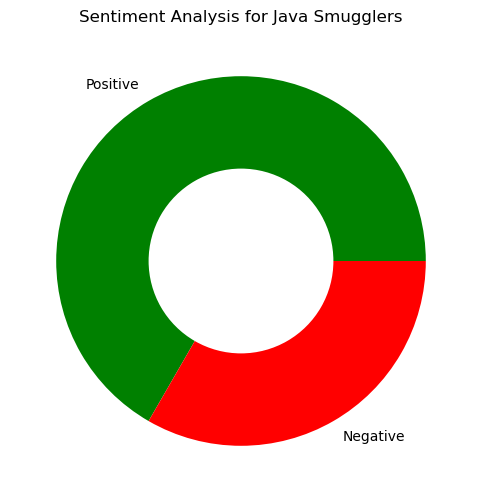

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
labels = ['Positive', 'Negative']
values = [pos, neg]
print(pos,neg)
# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title(f'Sentiment Analysis for {name}')

plt.show()

### doing the same steps for NaieveBayesAnalyzer

In [25]:
from textblob.sentiments import NaiveBayesAnalyzer

In [60]:
reviews_df_nba = []
for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    p = [0,0,0]
    n = [0,0,0]
    k=0
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using NaieveBayesAnalyzer
        blob = TextBlob(review['text'],analyzer=NaiveBayesAnalyzer())
        sentiment = blob.sentiment
        
        if sentiment.p_pos > 0.5:
            print('    Sentiment: Positive')
            p[k] = sentiment.p_pos
        elif sentiment.p_pos < 0.5:
            print('    Sentiment: Negative')
            n[k] = sentiment.p_neg
        k = k + 1     
    My_dict_nba = {
                "Name" : business['name'],
                "Pos_Review_1": p[0],
                "Pos_Review_2": p[1],
                "Pos_Review_3": p[2],
                "Neg_Review_1": n[0],
                "Neg_Review_2": n[1],
                "Neg_Review_3": n[2]
                        }
    reviews_df_nba.append(My_dict_nba)

Business Name: Java Smugglers
Rating: 4.2
Review Count: 35
Reviews: 
Querying https://api.yelp.com/v3/businesses/RaLpBBtkbHX9XMVYXQisFg/reviews ...
 - Stumbled in here last weekend while I was in search of a coffee shop near me - thanks Yelp!
The vibe was so cute - lots of antique furniture and decor....
    Sentiment: Positive
 - Terrible coffee. One barista, all alone, who stated she was "struggling." My group got pistachio lattes and an iced bourbon mocha latte. All the drinks were...
    Sentiment: Negative
 - Does Boonton really need yet another coffee shop??Yes it does! This place is amazing. Don't pass on the Apple Spice Latte! It's a life changer for sure....
    Sentiment: Positive
Business Name: Anechó Coffee
Rating: 5.0
Review Count: 1
Reviews: 
Querying https://api.yelp.com/v3/businesses/-7zxF98ZRLqvOCvHIDMeKQ/reviews ...
 - Nikki and her team at Anechó Coffee are absolutely perfect. We planned a Pop-Up, but due to increased demand at the last minute, we could no longer bre

In [66]:
import pandas as pd
cafes_nba = pd.DataFrame(reviews_df_nba)
row = cafes_nba.loc[0]

In [74]:
name = row.iloc[0]
pos = row.iloc[1]+row.iloc[2]+row.iloc[3]
neg = row.iloc[4]+row.iloc[5]+row.iloc[6]

1.5485893252121168 0.8428071503945146


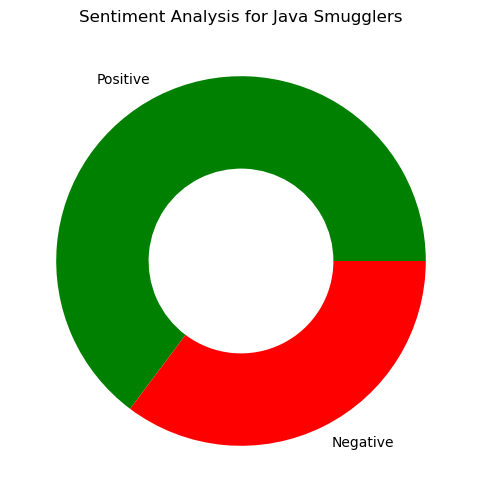

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
labels = ['Positive', 'Negative']
values = [pos, neg]
print(pos,neg)
# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title(f'Sentiment Analysis for {name}')

plt.show()